In [ ]:
import os
import pandas as pd
import numpy as np
from kaggle_dataset import DatasetDownloader

column_names = ['unit_number', 'time', 'os_1', 'os_2', 'os_3']
sensor_measurements = [f'sm_{i}' for i in range(1, 22)]

column_names.extend(sensor_measurements)

downloader = DatasetDownloader("behrad3d/nasa-cmaps")
downloaded_path = downloader.download()

path = os.path.join(downloaded_path, 'CMaps', 'train_FD001.txt')
train_data = pd.read_csv(f'{path}', sep= ' ', header=None, names = column_names, index_col=False)
print(train_data)

       unit_number  time    os_1    os_2   os_3    sm_1    sm_2     sm_3  \
0                1     1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70   
1                1     2  0.0019 -0.0003  100.0  518.67  642.15  1591.82   
2                1     3 -0.0043  0.0003  100.0  518.67  642.35  1587.99   
3                1     4  0.0007  0.0000  100.0  518.67  642.35  1582.79   
4                1     5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85   
...            ...   ...     ...     ...    ...     ...     ...      ...   
20626          100   196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98   
20627          100   197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50   
20628          100   198  0.0004  0.0000  100.0  518.67  643.42  1602.46   
20629          100   199 -0.0011  0.0003  100.0  518.67  643.23  1605.26   
20630          100   200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38   

          sm_4   sm_5  ...   sm_12    sm_13    sm_14   sm_15  sm_16  sm_17  \
0      14

C:\Users\nadee\AppData\Local\Temp\ipykernel_4424\3062482007.py:15: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  train_data = pd.read_csv(f'{path}', sep= ' ', header=None, names = column_names, index_col=False)


In [3]:
df_info = pd.concat([train_data.isna().sum(), train_data.nunique(), train_data.dtypes], axis=1)

df_info.columns = ['missing value', 'number of unique value', 'data type']

df_info

,missing value,number of unique value,data type
unit_number,0,100,int64
time,0,362,int64
os_1,0,158,float64
os_2,0,13,float64
os_3,0,1,float64
sm_1,0,1,float64
sm_2,0,310,float64
sm_3,0,3012,float64
sm_4,0,4051,float64
sm_5,0,1,float64


In [4]:
df = train_data.copy()
print(df.shape)

(20631, 26)


In [5]:
def constant_features(df):
    constant_feature = []
    for col in df.columns:
        if abs(df[col].std() < 0.02):
            constant_feature.append(col)

    return constant_feature

In [6]:
print(constant_features(df=df))

['os_1', 'os_2', 'os_3', 'sm_1', 'sm_5', 'sm_6', 'sm_10', 'sm_16', 'sm_18', 'sm_19']


In [7]:
df.drop(columns=constant_features(df), inplace=True)
df.columns

Index(['unit_number', 'time', 'sm_2', 'sm_3', 'sm_4', 'sm_7', 'sm_8', 'sm_9',
       'sm_11', 'sm_12', 'sm_13', 'sm_14', 'sm_15', 'sm_17', 'sm_20', 'sm_21'],
      dtype='object')

In [8]:
def rul(df):
    df['RUL'] = df.groupby('unit_number')['time'].transform('max') - df['time']

    return df

rul(df)

,unit_number,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,9065.52,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,9065.11,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,9065.90,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,9073.72,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [9]:
mask = np.triu(np.ones(df.shape).astype(bool))
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
df_corr = df.corr()
mask = np.tril(np.ones(df_corr.shape), k=-1).astype(bool)
df_corr = df_corr.where(mask)
df_corr

,unit_number,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_9,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
unit_number,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,0.078753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_2,0.014133,0.549898,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_3,0.012621,0.543947,0.602610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_4,0.026116,0.624577,0.714949,0.678413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_7,-0.032073,-0.595914,-0.702136,-0.664595,-0.793130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_8,0.039929,0.475977,0.662325,0.602481,0.746852,-0.767132,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_9,-0.052053,0.443999,0.273764,0.322964,0.297429,-0.217835,-0.032091,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_11,0.024707,0.634385,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sm_12,-0.031882,-0.611354,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'correlation'}>

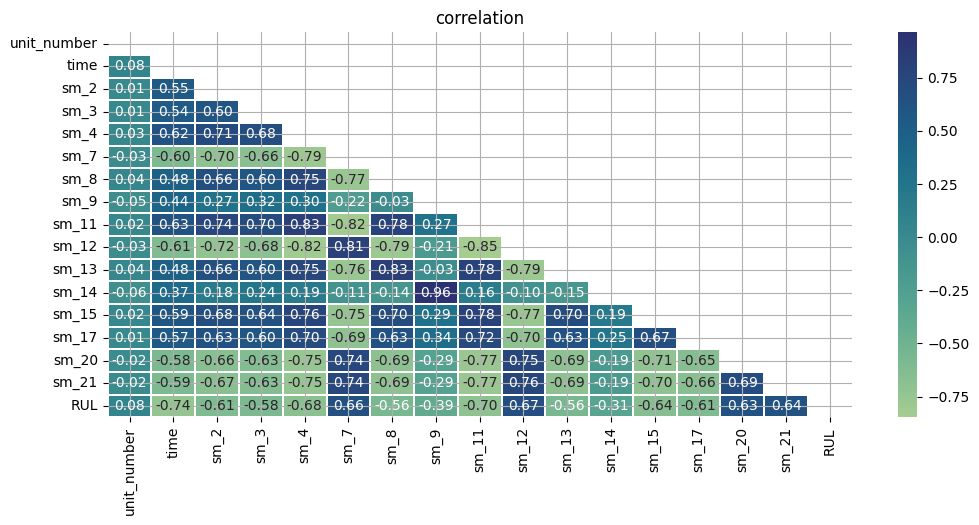

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(12,5))
plt.grid(), plt.title('correlation')
sns.heatmap(df_corr, annot=True, fmt='0.2f', cmap='crest', linewidths=0.01)


In [12]:
high_corr = []
for col in df_corr.columns:
    for row in df_corr.index:
        if abs(df_corr.loc[row, col]) > 0.95:
            high_corr.append((col,row))

high_corr

[('sm_9', 'sm_14')]

In [13]:
df.drop(columns=['sm_9'], inplace=True)

In [14]:
df

,unit_number,time,sm_2,sm_3,sm_4,sm_7,sm_8,sm_11,sm_12,sm_13,sm_14,sm_15,sm_17,sm_20,sm_21,RUL
0,1,1,641.82,1589.70,1400.60,554.36,2388.06,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,191
1,1,2,642.15,1591.82,1403.14,553.75,2388.04,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,190
2,1,3,642.35,1587.99,1404.20,554.26,2388.08,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,189
3,1,4,642.35,1582.79,1401.87,554.45,2388.11,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,188
4,1,5,642.37,1582.85,1406.22,554.00,2388.06,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,643.49,1597.98,1428.63,551.43,2388.19,48.07,519.49,2388.26,8137.60,8.4956,397,38.49,22.9735,4
20627,100,197,643.54,1604.50,1433.58,550.86,2388.23,48.04,519.68,2388.22,8136.50,8.5139,395,38.30,23.1594,3
20628,100,198,643.42,1602.46,1428.18,550.94,2388.24,48.09,520.01,2388.24,8141.05,8.5646,398,38.44,22.9333,2
20629,100,199,643.23,1605.26,1426.53,550.68,2388.25,48.39,519.67,2388.23,8139.29,8.5389,395,38.29,23.0640,1


In [15]:
train_data['time'].describe()

count    20631.000000
mean       108.807862
std         68.880990
min          1.000000
25%         52.000000
50%        104.000000
75%        156.000000
max        362.000000
Name: time, dtype: float64

In [16]:
failure_time = df.groupby('unit_number')['RUL'].max()
failure_time

unit_number
1      191
2      286
3      178
4      188
5      268
      ... 
96     335
97     201
98     155
99     184
100    199
Name: RUL, Length: 100, dtype: int64

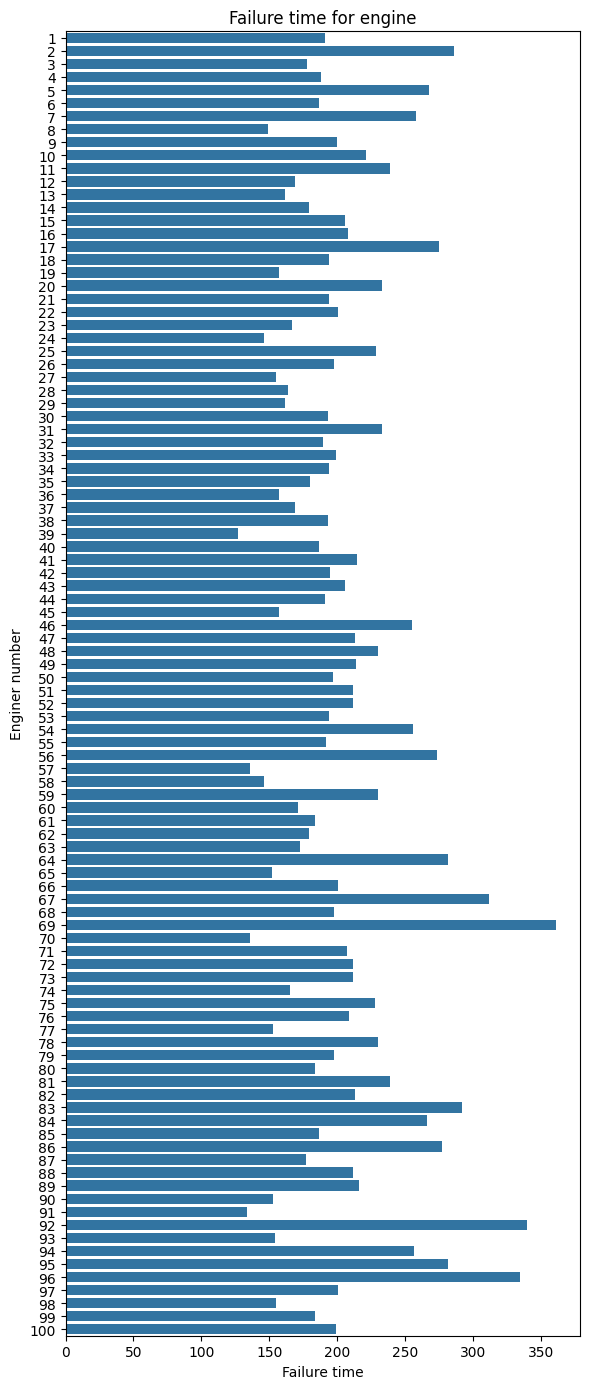

In [17]:
plt.figure(figsize=(6,14))
sns.barplot(y=failure_time.index, x=failure_time.values, orient='h')
plt.xlabel('Failure time')
plt.ylabel('Enginer number')
plt.title('Failure time for engine')
plt.tight_layout()
plt.show()

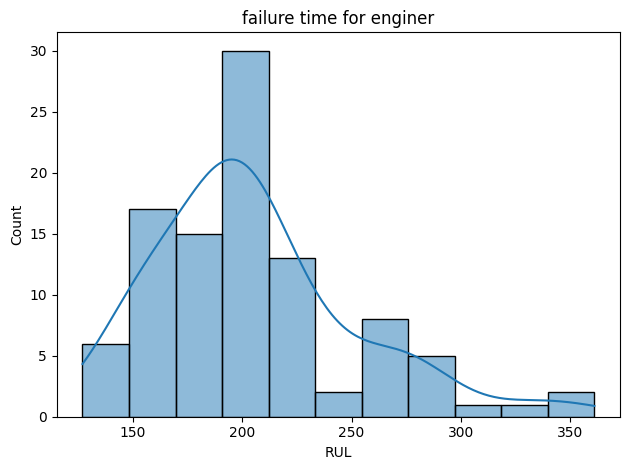

In [18]:
sns.histplot(failure_time, kde=True)
plt.title('failure time for enginer')
plt.tight_layout()

In [24]:
def plot_signal(df, signal_name):
    plt.figure(figsize=(10,4))

    for engine in df['unit_number'].unique():
        if engine%10 == 0:
            rolling_window = df[df['unit_number'] == engine].rolling(10).mean()
            sns.lineplot(data=rolling_window, x = 'RUL', y=signal_name, label=engine)

    plt.tight_layout(), plt.xlim(250,0)
    plt.xlabel('RUL'), plt.ylabel(signal_name)
    plt.show()

<Figure size 1000x400 with 0 Axes>

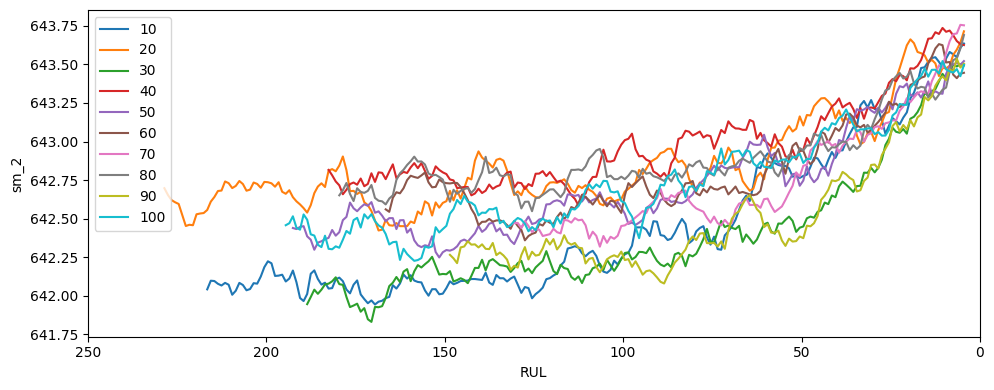

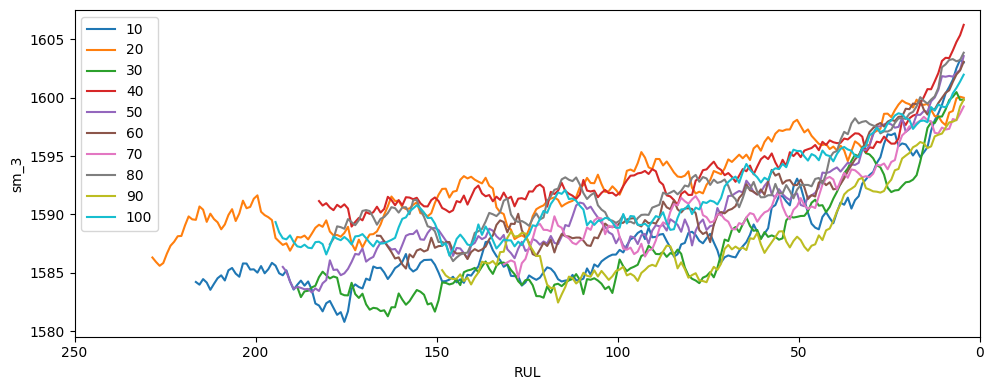

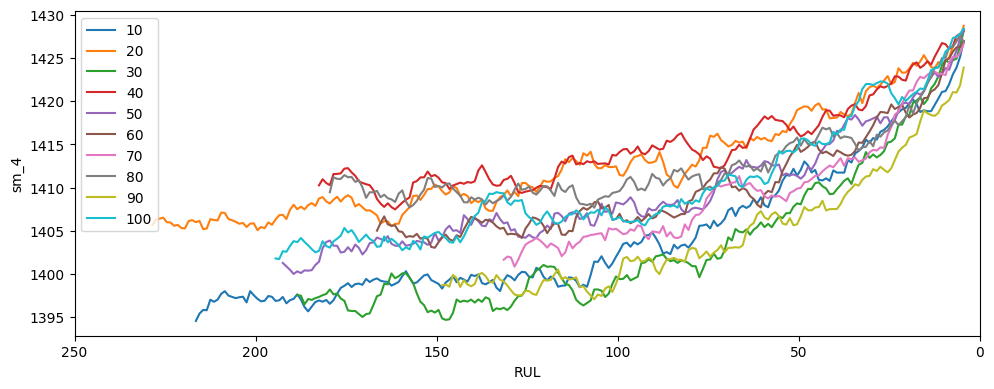

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

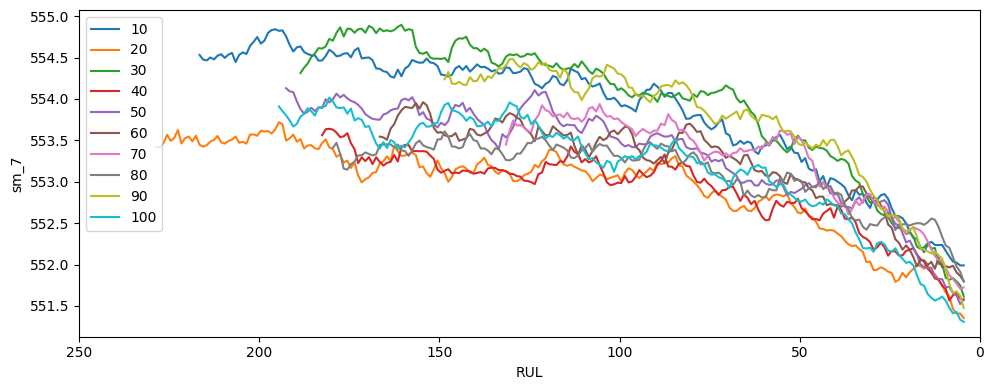

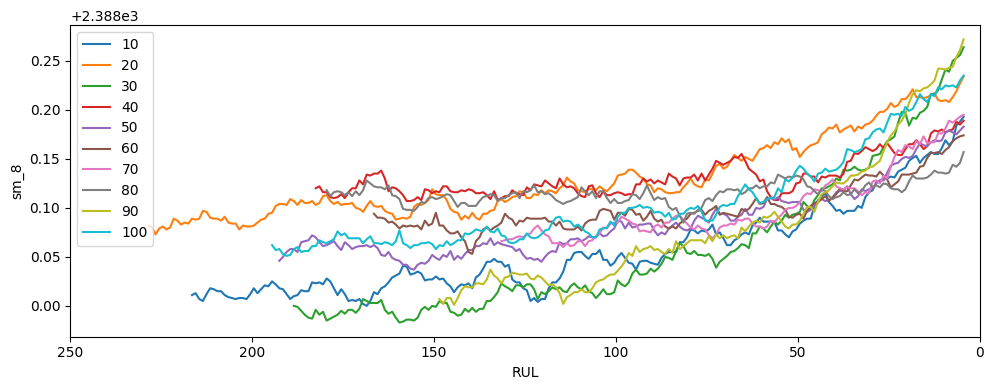

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

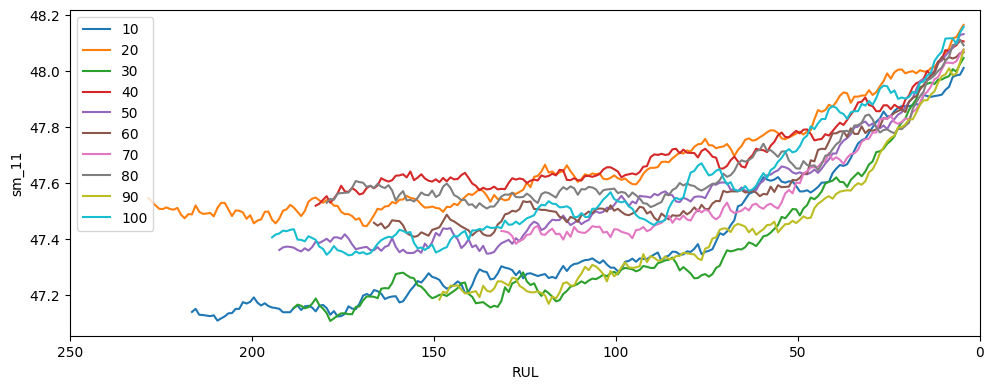

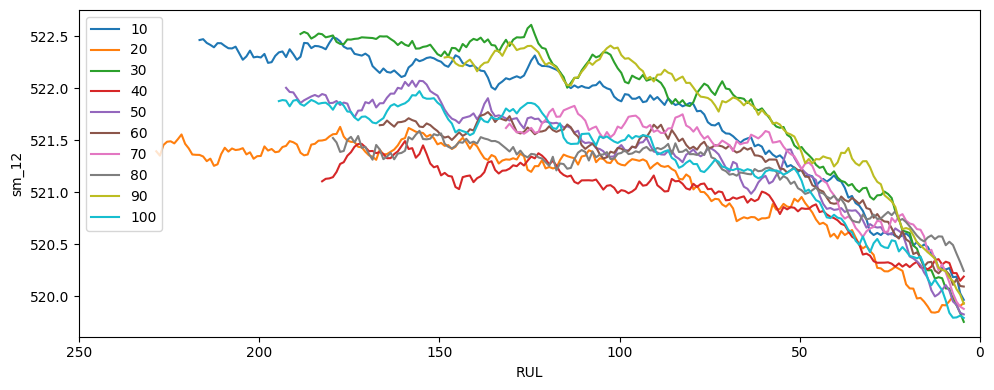

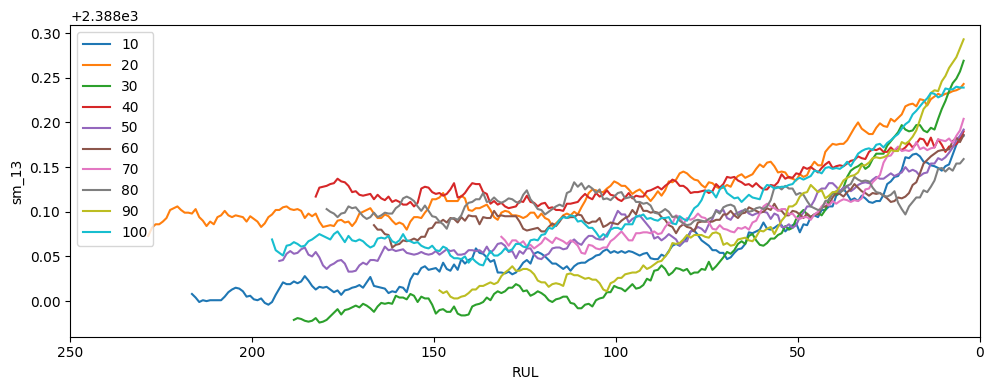

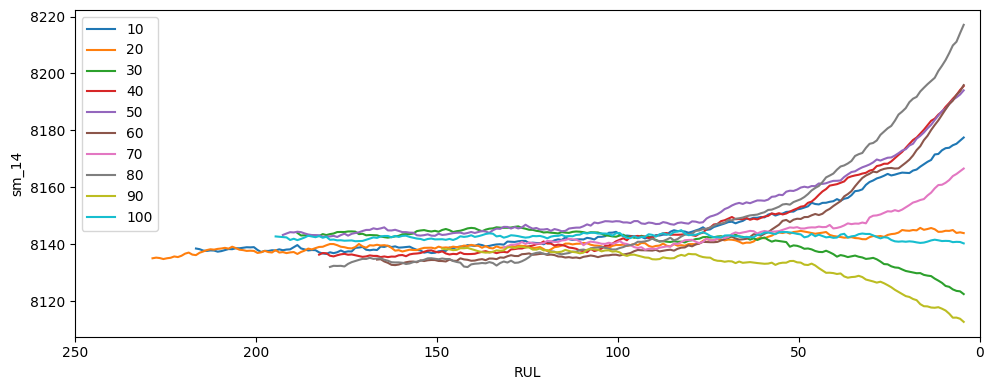

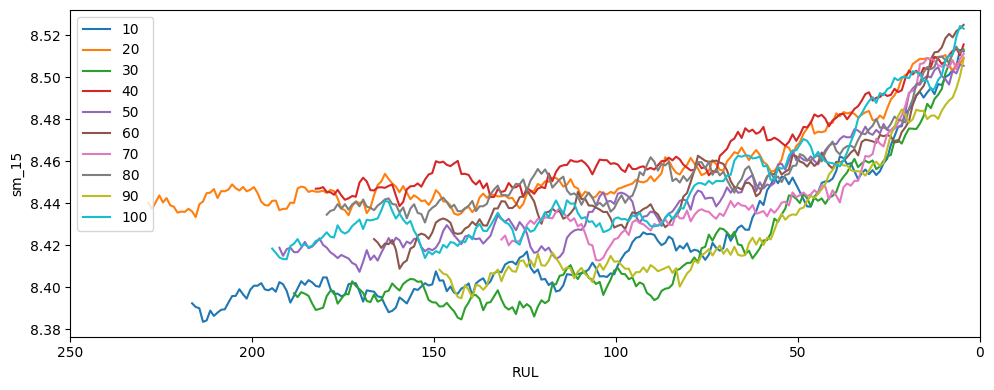

<Figure size 1000x400 with 0 Axes>

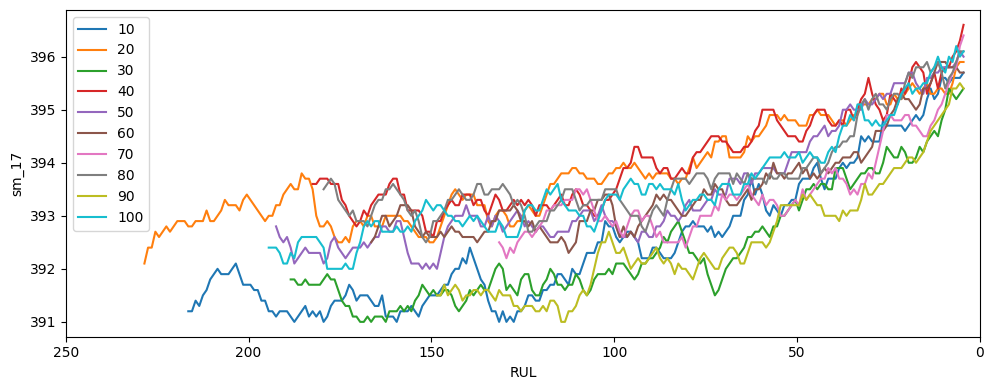

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

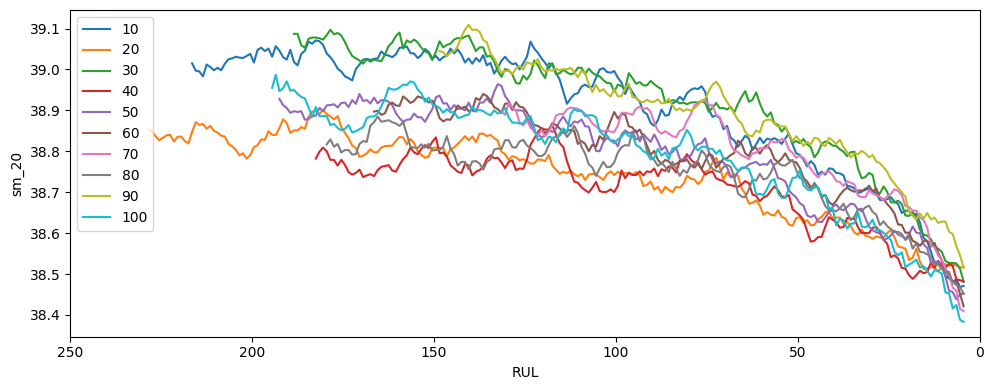

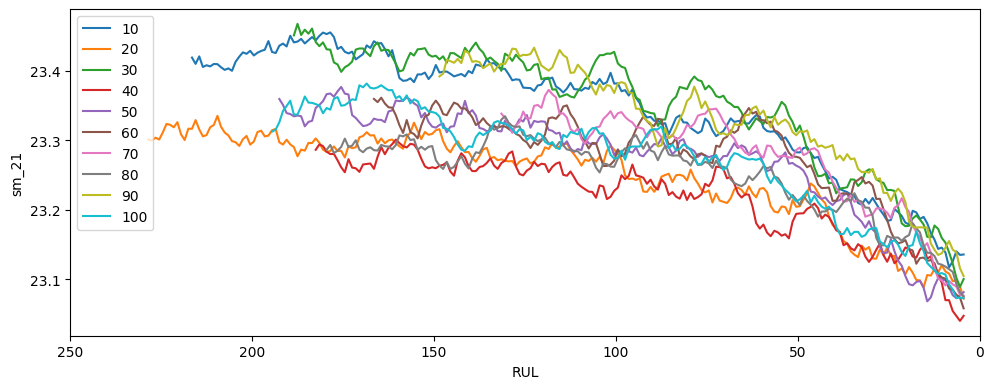

In [23]:
for i in range(1,22):
    try:
        plot_signal(df, 'sm_'+str(i))

    except:
        pass